## Linear Regression Model

We are going to make a simple model of linear regression to predict the price of some houses in our dataset. We are using two simple tecniques, one with StatsModels library and two with Skelearn.

# Import Libraries

In [12]:
#Here we are importing all the libraries we are using (we are writing them all down even... 
#if we are not using all of them, just for the habit)

import numpy as np #We use "as" to change the name of the library so we don´t write so much when coding.
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() #this is just to make the plots a bit more awesome
from sklearn.linear_model import LinearRegression #this one is a bit different, here we are taking from the sklearn package the "section" we are interested in.
#The most common error here, is syntax error! be careful with names of the libraries.

## Import the data

In [5]:
# We use the pandas read_csv method to read, well, a csv file. Note that we use pd instead of pandas.
#the 'r' that is in the begining of the path of the file, is telling to pandas the next information is raw. So it will not interpret the special characters.
data = pd.read_csv(r'C:\Users\Hugo Moran\Documents\GitHub\Machine-Learning_Linear_Regression\Houses_price_size.csv') 


In [6]:
#we now observe how the data looks like
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [7]:
#the head method just show the first five rows, so to be able to know how many rows we got, we use...
data.describe()
#So we got 100 sample of houses prices and its corresponding size
#this function also shows some basic statistics of the data.

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Creating the dependent and independent variables

In [38]:
y = data['price'] #as we want to predict the price of a house using the size of it, we state the price column as the dependent variable (depends on the size variable!)
x1 = data['size']

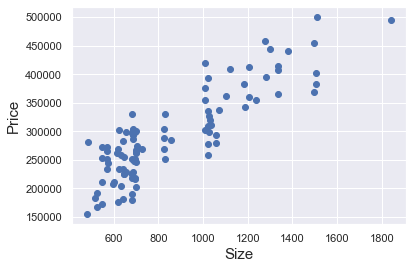

In [29]:
plt.scatter(x1,y) # we use the matplotlib library for plotting
plt.xlabel('Size', fontsize = 15 ) # this change the x-label (of course!) and the fontsize... yup it changes the size of the letters
plt.ylabel('Price', fontsize = 15)
plt.show()#... and this is to.... Show the plot!. too easy right?

## First Regression (statsmodels)

In [30]:
x = sm.add_constant(x1) #we are adding a constant to the independets variable, this is the paremeter to be optimize
results = sm.OLS(y,x).fit() # we use here the statsmodels library and the Ordinary Least Square (OLS) is one of the most used method for linear regression. We need to fit them with the data
results.summary() # we do a summary of the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           8.13e-31
Time:                        15:33:25   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

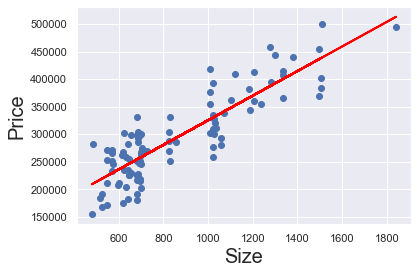

In [31]:
#if you know a little bit of statitics you will undertand somo of the features shown in the last code.
plt.scatter(x1,y)
y_hat = x1*223.1787+1.019e+05
fig = plt.plot(x1,y_hat, lw=2, c='red')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

## Making a prediction with the model

In [32]:
new_data = pd.DataFrame({'const': 1,'size': [1400, 1000]})
new_data = new_data[['const','size']]
new_data
# We want to know the precie of a house of 1400 and 1000 ft^2. We make a data frame with the input.

,const,size
0,1,1400
1,1,1000


In [33]:
predictions = results.predict(new_data) #we use the predict method to get the predicted value
predictions

0    414362.841434
1    325091.344396
dtype: float64

In [28]:
#the first value (index 0) is the price of the house of 1400 ft^2. if you note the graph it make sense that at that value give that output


## Second regression (sklearn)

In [41]:
# this way is more used and advanced, a little bit more tricky but more powerfull
reg = LinearRegression() #we create an object that "lives in the LinearRegression World"
reg.fit(x1, y) #note that the position of the data is different from the statsmodels.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#What is that? well to get the information as we got on the previous model, we got to write it.
reg.coef_ #we got the coefficent that is adjusted to the variable

array([223.17874259])

In [50]:
reg.intercept_ #this is the constant value, look that both values are the same as the previous method.

101912.60180122906

In [51]:
Y= 101912.60180122906 + x1*223.17874259 #we make the linear equation manually

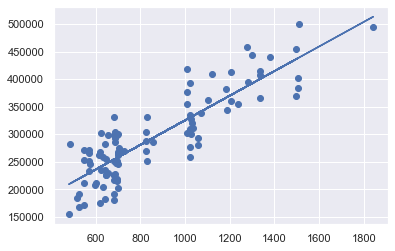

In [52]:
plt.scatter(x1,y)
plt.plot(x1,Y)
plt.show()

## Making a prediction 

In [53]:
x = pd.DataFrame([2000], columns= ['Size'])
reg.predict(x)


array([548270.08699044])

That would be all for now, even tho stats models looks easier, sklearn is more powerfull.
Look that we are making new data to test the model, is there a way to use the same data from the file to "train" the model and "testing" it?
Well... of course! we are making a simple tutorial using the train-test method.